In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32, #feeding 32 images at a time  
    image_size=(128, 128),  #width,height
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 70295 files belonging to 38 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 17572 files belonging to 38 classes.


In [4]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[213.   209.   207.  ]
   [215.25 211.25 210.75]
   [214.   209.   213.  ]
   ...
   [153.75 144.75 149.75]
   [146.5  137.5  142.5 ]
   [145.   136.   141.  ]]

  [[212.   207.5  210.  ]
   [213.5  208.75 212.5 ]
   [210.   205.   210.5 ]
   ...
   [146.   137.   142.  ]
   [147.5  138.5  143.5 ]
   [150.   141.   146.  ]]

  [[212.   207.   213.5 ]
   [209.75 204.75 211.25]
   [201.   196.   202.25]
   ...
   [143.75 134.75 139.75]
   [147.75 138.75 143.75]
   [148.75 139.75 144.75]]

  ...

  [[160.   150.   148.  ]
   [166.75 156.75 154.75]
   [163.   153.   151.  ]
   ...
   [122.   108.   108.  ]
   [132.75 118.75 118.75]
   [130.   116.   116.  ]]

  [[164.75 154.75 152.75]
   [167.   157.   155.  ]
   [163.   153.   151.  ]
   ...
   [120.75 106.75 106.75]
   [123.   109.   109.  ]
   [130.75 116.75 116.75]]

  [[168.5  158.5  156.5 ]
   [167.   157.   155.  ]
   [166.   156.   154.  ]
   ...
   [116.   102.   102.  ]
   [125.25 111.25 111.25]
   [131.25 117.25 11

In [ ]:
##MODEL

In [33]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [34]:
model = Sequential()

In [35]:
##Builiding CNN layer

In [36]:
model.add(Conv2D(filters = 32, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = [128,128,3]))
model.add(Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [37]:
model.add(Conv2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [38]:
model.add(Conv2D(filters = 128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [39]:
model.add(Conv2D(filters = 256, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 256, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [40]:
model.add(Conv2D(filters = 512, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(filters = 512, kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [41]:
model.add(Dropout(0.25))  #to avoid overfitting

In [42]:
model.add(Flatten())

In [43]:
model.add(Dense(units=1500, activation= 'relu'))

In [44]:
model.add(Dropout(0.4))

In [45]:
model.add(Dense(units = 38 , activation = 'softmax')) #probability form result

In [46]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics =['accuracy'])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
### MODEL TRAINING

In [48]:
 training_history = model.fit(x = training_set,validation_data = validation_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1884s 856ms/step - accuracy: 0.3959 - loss: 2.1545 - val_accuracy: 0.8522 - val_loss: 0.4656
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1936s 881ms/step - accuracy: 0.8442 - loss: 0.4907 - val_accuracy: 0.9170 - val_loss: 0.2636
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1696s 772ms/step - accuracy: 0.9091 - loss: 0.2756 - val_accuracy: 0.9463 - val_loss: 0.1643
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1725s 785ms/step - accuracy: 0.9389 - loss: 0.1845 - val_accuracy: 0.9507 - val_loss: 0.1613
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1613s 734ms/step - accuracy: 0.9536 - loss: 0.1416 - val_accuracy: 0.9544 - val_loss: 0.1456
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1481s 674ms/step - accuracy: 0.9663 - loss: 0.1029 - val_accuracy: 0.9590 - val_loss: 0.1309
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1480s 674ms/step - accuracy: 0.9720 - loss: 0.0837 - val_accuracy: 0.9592 - val_loss: 0.1307
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1482s 675ms/s

In [ ]:
###MODEL EVALUATION

In [50]:
train_loss , train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 358s 163ms/step - accuracy: 0.9905 - loss: 0.0313


In [51]:
print(train_loss,train_acc)

0.028975805267691612 0.991165816783905


In [52]:
val_loss , val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 89s 162ms/step - accuracy: 0.9658 - loss: 0.1083 


In [53]:
print(val_loss,val_acc)

0.10941427201032639 0.9663100242614746


In [55]:
model.save("trained_model.keras")

In [56]:
training_history.history

{'accuracy': [0.6040401458740234,
  0.8660644292831421,
  0.9177466630935669,
  0.9426132440567017,
  0.9564265012741089,
  0.9670957922935486,
  0.973525881767273,
  0.9760438203811646,
  0.9800839424133301,
  0.9818906188011169],
 'loss': [1.349787950515747,
  0.423516184091568,
  0.25203198194503784,
  0.17557662725448608,
  0.1322975903749466,
  0.0994502380490303,
  0.0790216475725174,
  0.0730891078710556,
  0.06102075055241585,
  0.0568026602268219],
 'val_accuracy': [0.8522080779075623,
  0.9169701933860779,
  0.9463350772857666,
  0.950717031955719,
  0.954359233379364,
  0.9589688181877136,
  0.9591964483261108,
  0.9723423719406128,
  0.9664807915687561,
  0.9663100242614746],
 'val_loss': [0.46560847759246826,
  0.26364657282829285,
  0.16433049738407135,
  0.1612536460161209,
  0.14558517932891846,
  0.13090412318706512,
  0.1306879222393036,
  0.09384654462337494,
  0.10911045968532562,
  0.10941430181264877]}

In [57]:
## Record history in json format 
import json 
with open("training_hist.json","w")as f:
    json.dump(training_history.history,f)

In [ ]:
### ACCURACY VISUALIZATION

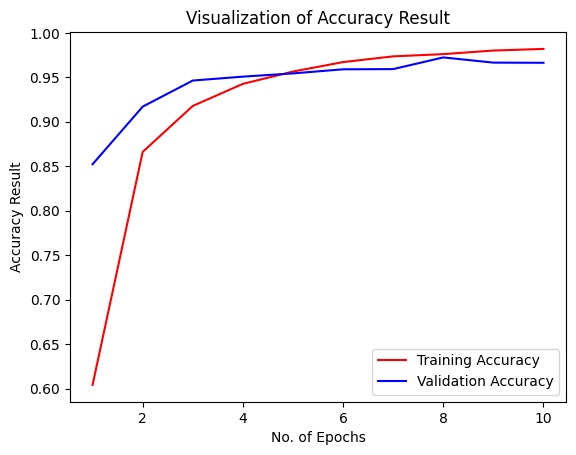

In [67]:
epochs = [i for i in range (1,11)]
plt.plot(epochs,training_history.history['accuracy'],color = 'red', label = 'Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()

plt.show()

In [68]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [69]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32, #feeding 32 images at a time  
    image_size=(128, 128),  #width,height
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False, 
)

Found 17572 files belonging to 38 classes.


In [70]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 80s 145ms/step 


(array([[9.9999881e-01, 3.3116965e-08, 8.1451995e-10, ..., 1.2335685e-13,
         1.2430633e-13, 6.1856353e-12],
        [9.9997067e-01, 1.0876778e-07, 1.4919907e-08, ..., 1.2203965e-12,
         3.1484388e-12, 2.4426340e-12],
        [1.0000000e+00, 2.4594616e-11, 2.4471947e-13, ..., 1.3402960e-19,
         8.9393136e-18, 1.1000127e-15],
        ...,
        [1.6526294e-10, 4.8025034e-12, 2.1548949e-08, ..., 2.1124878e-10,
         2.1399724e-09, 9.9999809e-01],
        [4.1959205e-09, 1.0593956e-11, 3.9161957e-08, ..., 1.5517787e-09,
         6.6882144e-09, 9.9998760e-01],
        [2.1763270e-12, 9.0413727e-14, 1.6973622e-11, ..., 8.1961466e-15,
         6.0709163e-13, 9.9999964e-01]], dtype=float32),
 (17572, 38))

In [72]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [73]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [76]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [81]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
print(classification_report (Y_true,predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.91      0.95       504
                                 Apple___Black_rot       1.00      0.96      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.98      0.94      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.93      1.00      0.96       421
                 Cherry_(including_sour)___healthy       1.00      0.97      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.90      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.98      0.

In [82]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

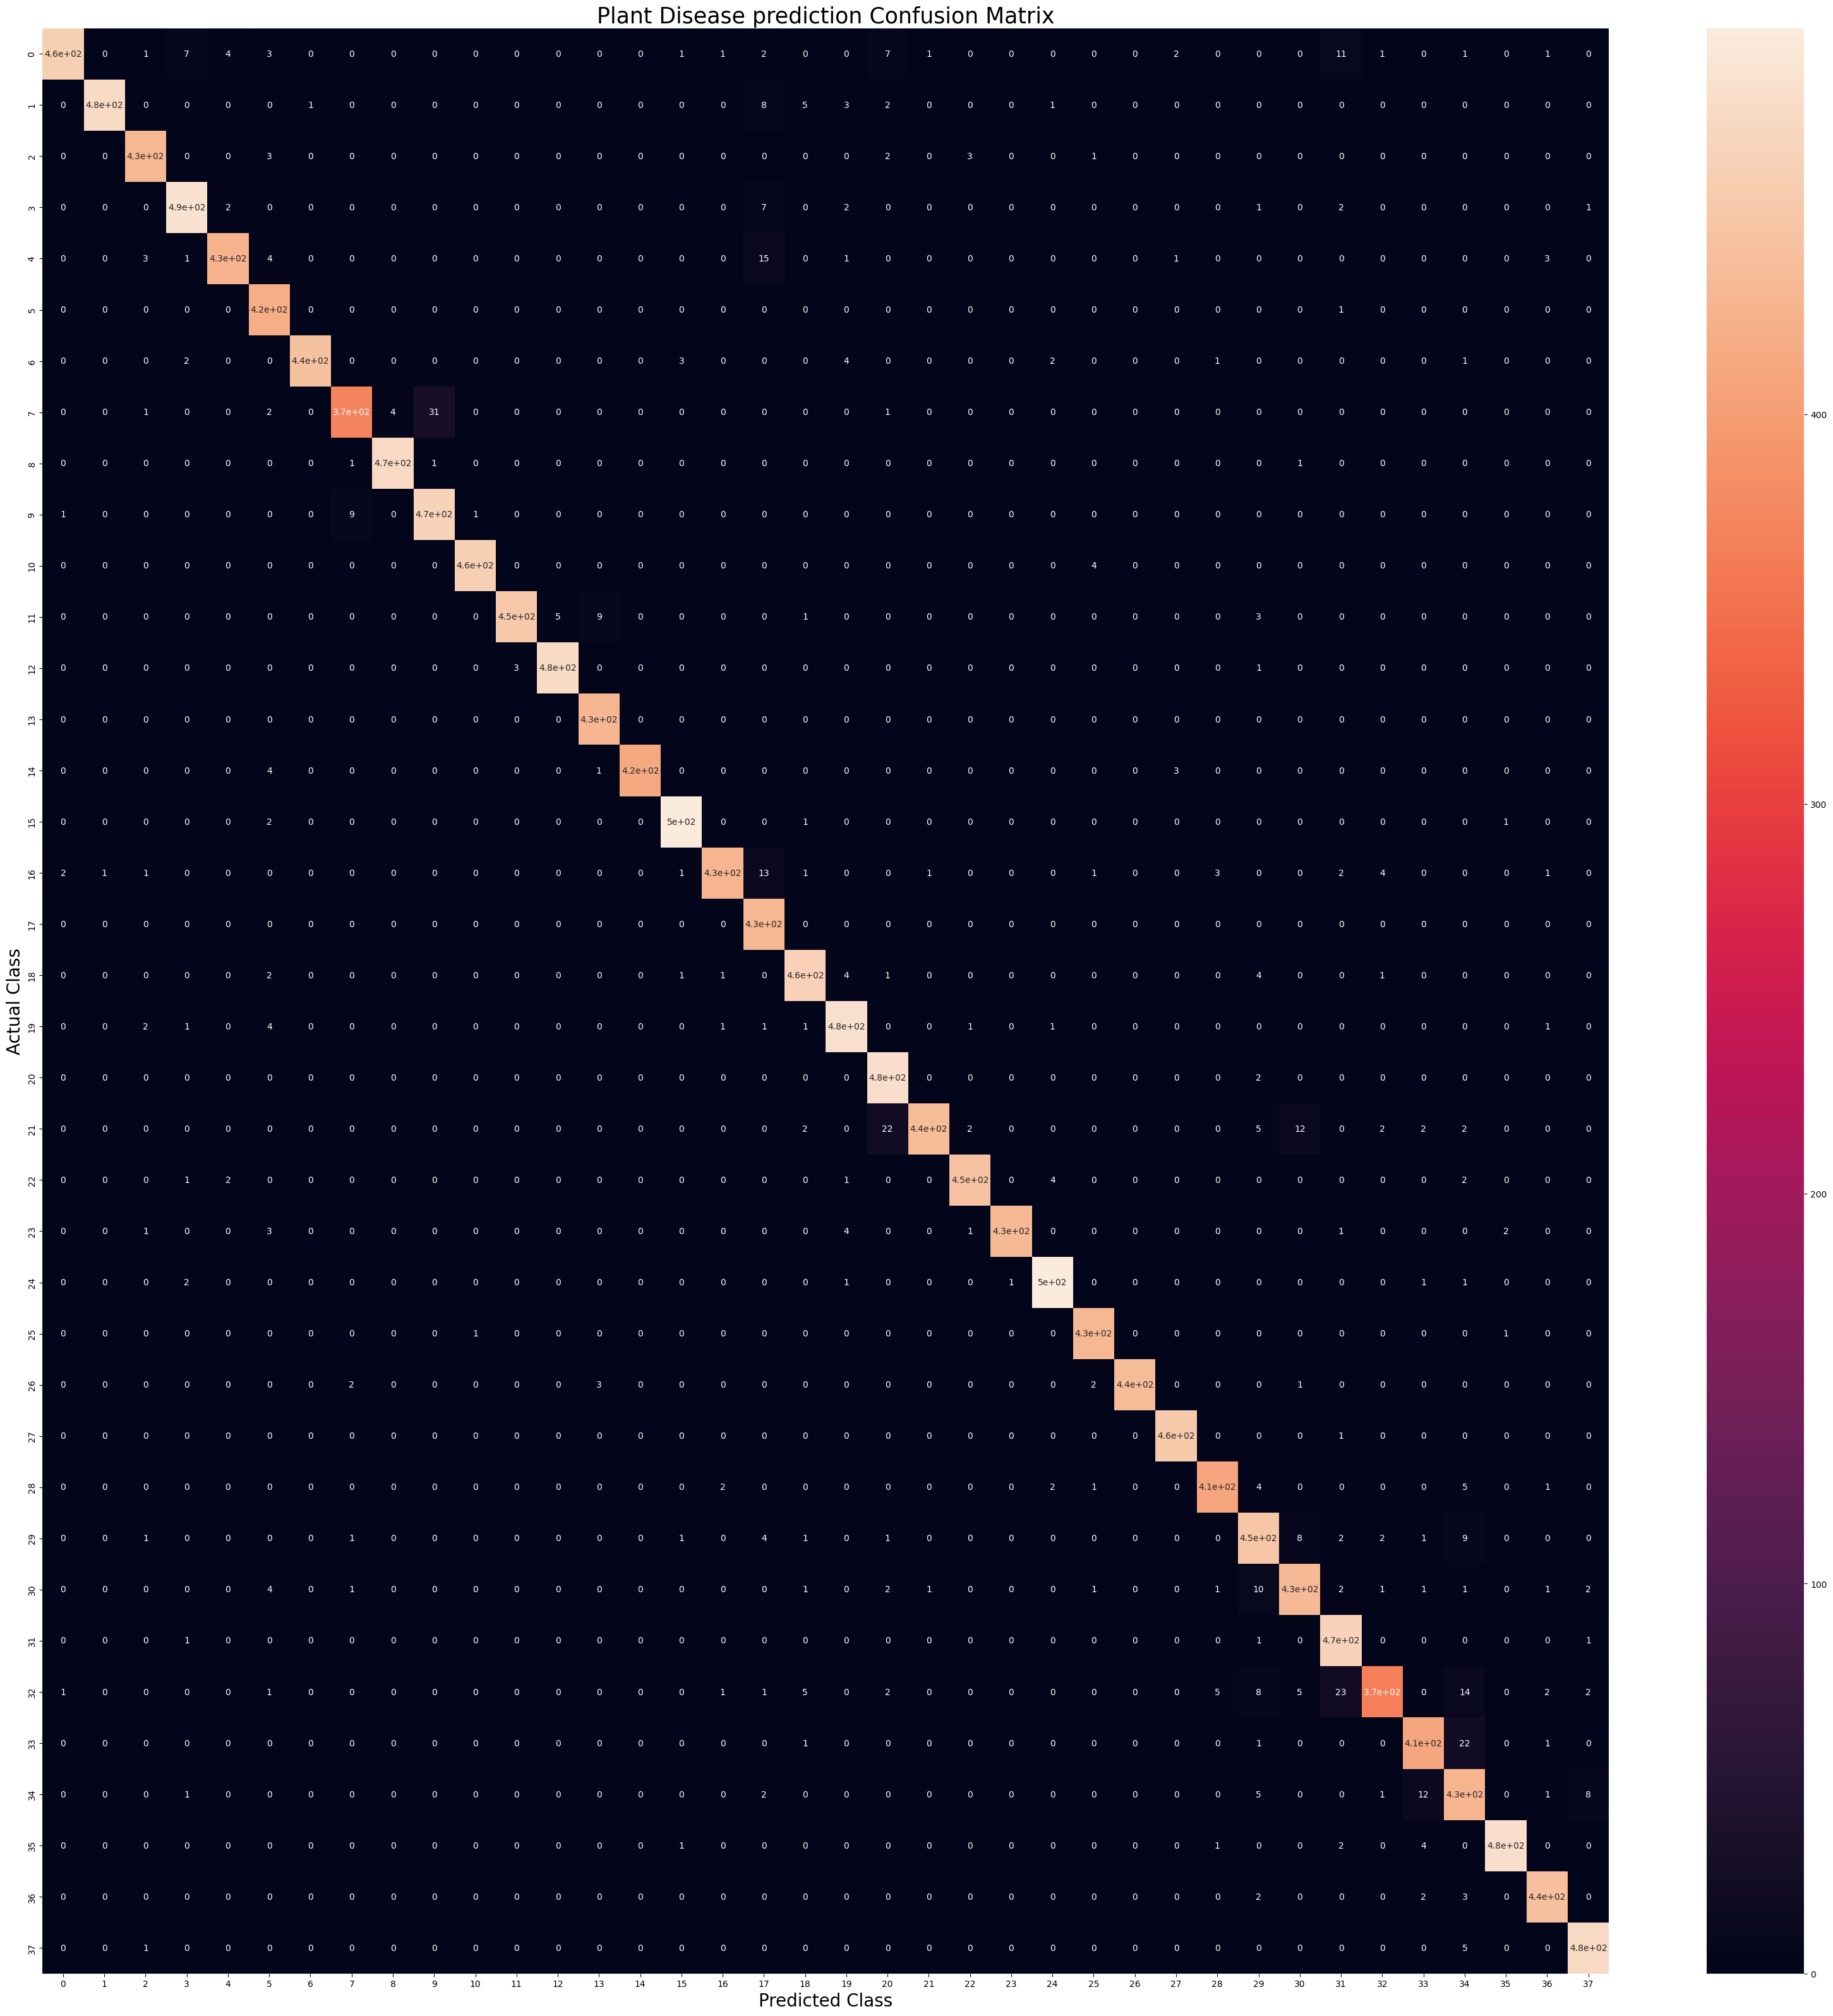

In [89]:
plt.figure(figsize = (40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("Actual Class" , fontsize = 20)
plt.title("Plant Disease prediction Confusion Matrix", fontsize = 25)
plt.show()